In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio

Metadata
ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

Patient demographics: name, age, sex, clinical information
Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)
Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

After reading in the image, use im.meta to select the true statement from the list below

In [2]:
im = imageio.imread("chest-220.dcm")

# Print the available metadata fields
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [3]:
im

Array([[-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       ...,
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000]], dtype=int16)

In [4]:
# getting the detail for every key index
im.meta['sampling']

(0.976562, 0.976562)

Plot images
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.
vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
plt.axis('off') removes axis and tick labels from the image.
For this exercise, plot the CT scan and investigate the effect of a few different parameters.

In [5]:
im = imageio.imread("chest-220.dcm")

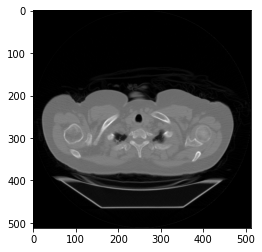

In [6]:
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

Draw the image in grayscale. Also, set vmin=-200 and vmax=200 to increase the contrast (i.e., the distance between the brightest and darkest colors is smaller than before).

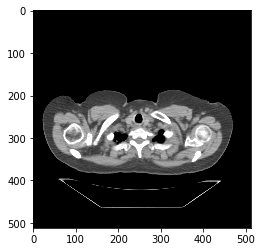

In [7]:
# Draw the image in grayscale
plt.imshow(im, cmap='gray',vmin=-200, vmax=200)

# Render the image
plt.show()

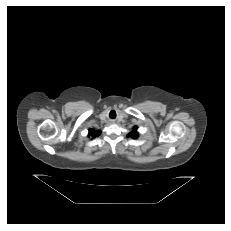

In [8]:
# Draw the image in grayscale
plt.imshow(im, cmap='gray',vmin=-200, vmax=200)
# Remove axis ticks and labels
plt.axis('off')

# Render the image
plt.show()

Stack images
Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.



In this exercise, we will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: vol[plane, row, col].

Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.

In [9]:
# Read in each 2D image
im1 = imageio.imread('chest-220.dcm')
im2 = imageio.imread('chest-221.dcm')
im3 = imageio.imread('chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1,im2,im3])
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


Load volumes
ImageIO's volread() function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the "tcia-chest-ct" folder, which contains 25 DICOM images.

In [10]:
# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct/")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


Field of view
The amount of physical space covered by an image is its field of view, which is calculated from two properties:

Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).
For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of vol. All values are in millimeters.

In [11]:
# calculate the shape of every image
n0,n1,n2 = vol.shape

In [12]:
n0,n1,n2

(5, 512, 512)

In [13]:
# amount of physical space covered
d0,d1,d2 = vol.meta['sampling']

In [14]:
d0,d1,d2

(3.269999999999996, 0.976562, 0.976562)

In [15]:
# Field of view
n0*d0,n1*d1,n2*d2

(16.34999999999998, 499.999744, 499.999744)

Generate subplots
You can draw multiple images in one figure to explore data quickly. Use plt.subplots() to generate an array of subplots.

fig, axes = plt.subplots(nrows=2, ncols=2)

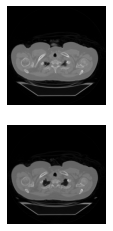

In [16]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1,cmap='gray')
axes[1].imshow(im2,cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

Slice 3D images
The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.
To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: vol[0, :, :]

For this exercise, use for loop to plot every 40th slice of vol on a separate subplot. matplotlib.pyplot (as plt) has been imported for you.

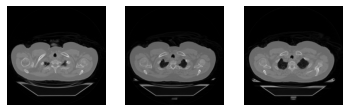

In [17]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=3)

# Loop through subplots and draw image
for ii in range(3):
    im = vol[ii * 2]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

Plot other views
Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images.

Changing the aspect ratio can address this by increasing the width of one of the dimensions.

For this exercise, plot images that slice along the second and third dimensions of vol. Explicitly set the aspect ratio to generate undistorted images.

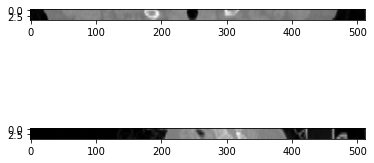

In [23]:
# Select frame from "vol"
# vol = imageio.volread('vol_image.png')
im1 = vol[:, 256, :]
im2 = vol[:,:,256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0/d1


# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect = asp1)
axes[1].imshow(im2,cmap='gray', aspect = asp2)
plt.show()

# Intensity
In this chapter, we will work with a hand radiograph from a 2017 Radiological Society of North America competition. X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.

To start, let's load the image and check its intensity range.

The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.

All exercises in this chapter have the following imports:

Data type: uint8
Min. value: 3
Max value: 224


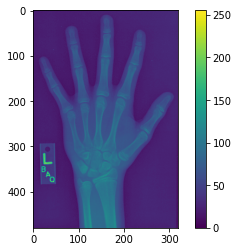

In [41]:
# Load the hand radiograph
im = imageio.imread('hand_xray.png')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0,vmax=255)
plt.colorbar()
# format_and_render_plot()

# Histograms
Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the cumulative distribution function. It measures the frequency with which a given range of pixel intensities occurs.

For this exercise, describe the intensity distribution in im by calculating the histogram and cumulative distribution function and displaying them together.

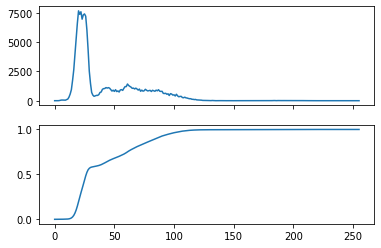

In [28]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins =256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
# format_and_render_plot()

# Create a mask
Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)

Below is the histogram of im colored by the segments we will plot.



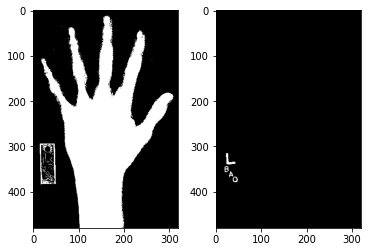

In [35]:
# Create skin and bone masks
mask_bone = im >= 145
mask_skin = (im >= 45) & (im < 145)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap = 'gray')
axes[1].imshow(mask_bone, cmap = 'gray')
# format_and_render_plot()

# Apply a mask
Although masks are binary, they can be applied to images to filter out pixels where the mask is False.

NumPy's where() function is a flexible way of applying masks. It takes three arguments:

np.where(condition, x, y)
condition, x and y can be either arrays or single values. This allows you to pass through original image values while setting masked values to 0.

Let's practice applying masks by selecting the bone-like pixels from the hand x-ray (im

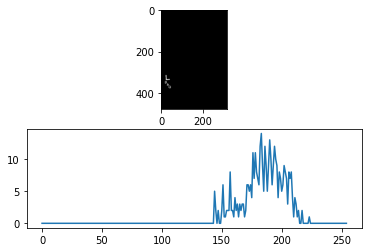

In [38]:
# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(im >=145, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone,cmap = 'gray')
axes[1].plot(hist)
# format_and_render_plot()

# Tune a mask
Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

binary_dilation: Add pixels along edges
binary_erosion: Remove pixels along edges
binary_opening: Erode then dilate, "opening" areas near edges
binary_closing: Dilate then erode, "filling in" holes
For this exercise, create a bone mask then tune it to include additional pixels.

For the remaining exercises, we have run the following import for you:

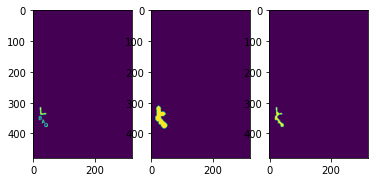

In [44]:
# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations = 5)
mask_closed = ndi.binary_closing(mask_bone, iterations =5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
# format_and_render_plot()

# Filter convolutions
Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.

2D array convolution. By Michael Plotke [CC BY-SA 3.0  (https://creativecommons.org/licenses/by-sa/3.0)], from Wikimedia Commons

For this exercise, smooth the foot radiograph. First, specify the weights to be used. (These are called "footprints" and "kernels" as well.) Then, convolve the filter with im and plot the result.

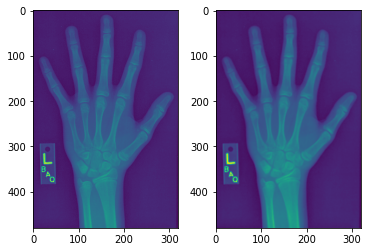

In [45]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)
# format_and_render_plot()

In [56]:
im1 = np.array([[93, 36,  87], 
               [18, 49,  51],
               [45, 32,  63]])

im_filt = ndi.convolve(im, im1)

# assert im_filt[1,1] == 49


In [57]:
ndi.maximum_filter(im_filt, size=3)

array([[27174, 27474, 27474],
       [27174, 27474, 27474],
       [26089, 26089, 26089]])

In [58]:
ndi.median_filter(im_filt, size=3)

array([[27072, 27072, 27072],
       [21648, 25794, 25794],
       [20920, 21648, 23778]])

In [59]:
ndi.percentile_filter(im_filt, 60, size=3)

array([[27174, 27174, 27474],
       [26089, 26089, 26089],
       [20920, 23778, 23778]])

In [60]:
ndi.uniform_filter(im_filt, size=3)

array([[25802, 26330, 26857],
       [22969, 24161, 25352],
       [20137, 21992, 23847]])

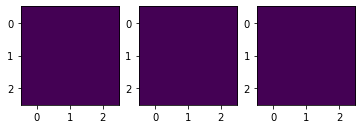

In [63]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145)
axes[1].imshow(im_s1>= 145)
axes[2].imshow(im_s3>= 145)
plt.show()
# format_and_render_plot()